<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab2_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(url)
df = tables[2]  # Таблиця, що містить дані про ВВП

# Відображення перших рядків таблиці для перевірки
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [42]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [43]:
# Поточні назви стовпців
current_columns = [
    ('Country/Territory', 'Country/Territory'),
    ('IMF[1][13]', 'Forecast'),
    ('IMF[1][13]', 'Year'),
    ('World Bank[14]', 'Estimate'),
    ('World Bank[14]', 'Year'),
    ('United Nations[15]', 'Estimate'),
    ('United Nations[15]', 'Year')
]

# Зручні назви стовпців
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]

df.columns = new_columns

df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [44]:
# Виберемо необхідні стовпці та надамо їм нові назви
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]
#df1.drop(['IMF_Year', 'WorldBank_Year', 'UN_Year'], axis=1)

# Перейменуємо стовпці
df = df1.rename(columns=selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [45]:
df.shape

(210, 4)

In [46]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [47]:
print("\nТипи даних кожного стовпця:\n", df.dtypes)


Типи даних кожного стовпця:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [48]:
# Замінити всі неперетворювані значення на NaN
df.replace('-', float('nan'), inplace=True)

# Переведемо стовпці у тип float
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

# Виведемо типи даних після конвертації
print("\nТипи даних після конвертації: \n", df.dtypes)

# Відобразимо перші кілька рядків для перевірки
df.head(10)


Типи даних після конвертації: 
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [49]:
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [51]:
import numpy as np


df = df.replace({'-': np.NaN})


df = df.fillna(df.mean(numeric_only=True), axis=0)

df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [52]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [53]:
df = df[df['Country'] != 'World']

# Reset the index after removing the 'World' row
df = df.reset_index(drop=True)

In [54]:
df.describe()

,MVF_2024,WorldBank_2023,OON_2022
count,2.090000e+02,2.090000e+02,2.090000e+02
mean,6.045387e+05,5.376926e+05,4.834061e+05
std,2.439594e+06,2.328003e+06,2.236990e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.446700e+04,1.043800e+04,8.772000e+03
50%,5.631000e+04,4.320500e+04,3.171700e+04
75%,4.099890e+05,3.355330e+05,2.371010e+05
max,2.878108e+07,2.736094e+07,2.574410e+07


10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)

In [55]:
df['MVF_WB_Difference'] = df['MVF_2024'] - df['WorldBank_2023']
largest_differences = df.nlargest(5, 'MVF_WB_Difference')[['Country', 'MVF_WB_Difference']]

print("10. Countries with largest differences between MVF_2024 and WorldBank_2023:")
print(largest_differences)

10. Countries with largest differences between MVF_2024 and WorldBank_2023:
                      Country  MVF_WB_Difference
0               United States       1.420148e+06
195  Turks and Caicos Islands       1.121826e+06
192              Sint Maarten       1.121605e+06
177                   Curaçao       1.120154e+06
175                 Greenland       1.119992e+06


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [56]:
correlations = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("\n11. Correlations between indicators:")
print(correlations)


11. Correlations between indicators:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.993137  0.992032
WorldBank_2023  0.993137        1.000000  0.996336
OON_2022        0.992032        0.996336  1.000000


12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [57]:
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("\n12. Mean values for each indicator:")
print(mean_values)


12. Mean values for each indicator:
MVF_2024          604538.747884
WorldBank_2023    537692.609314
OON_2022          483406.095007
dtype: float64


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [62]:
df['StdDev'] = df[['OON_2022', 'WorldBank_2023', 'MVF_2024']].std(axis=1)
df['CV'] = df['StdDev'] / df[['OON_2022', 'WorldBank_2023', 'MVF_2024']].mean(axis=1)

print("\n13. Standard Deviation and Coefficient of Variation for each country:")
print(df[['Country', 'StdDev', 'CV']].sort_values('CV', ascending=False))

highest_variability = df.nlargest(5, 'CV')[['Country', 'CV']]
print("\nTop 5 countries with highest variability (by Coefficient of Variation):")
print(highest_variability)


13. Standard Deviation and Coefficient of Variation for each country:
                      Country         StdDev        CV
195  Turks and Caicos Islands  647762.586162  1.726189
192              Sint Maarten  647573.491001  1.724682
177                   Curaçao  646720.744152  1.717905
175                 Greenland  646717.009950  1.717876
165          French Polynesia  645138.804414  1.705428
..                        ...            ...       ...
3                       Japan   65435.124199  0.015635
110          Papua New Guinea     424.561342  0.013513
143               Afghanistan     180.119405  0.012525
37                    Denmark    4937.151811  0.012197
140                     Congo      97.960877  0.006366

[209 rows x 3 columns]

Top 5 countries with highest variability (by Coefficient of Variation):
                      Country        CV
195  Turks and Caicos Islands  1.726189
192              Sint Maarten  1.724682
177                   Curaçao  1.717905
175         

14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [59]:
highest_lowest = pd.DataFrame({
    'MVF_2024': [df.loc[df['MVF_2024'].idxmax(), 'Country'], df.loc[df['MVF_2024'].idxmin(), 'Country']],
    'WorldBank_2023': [df.loc[df['WorldBank_2023'].idxmax(), 'Country'], df.loc[df['WorldBank_2023'].idxmin(), 'Country']],
    'OON_2022': [df.loc[df['OON_2022'].idxmax(), 'Country'], df.loc[df['OON_2022'].idxmin(), 'Country']]
}, index=['Highest', 'Lowest'])

print("\n14. Countries with highest and lowest indicators:")
print(highest_lowest)



14. Countries with highest and lowest indicators:
              MVF_2024 WorldBank_2023       OON_2022
Highest  United States  United States  United States
Lowest          Tuvalu         Tuvalu         Tuvalu


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

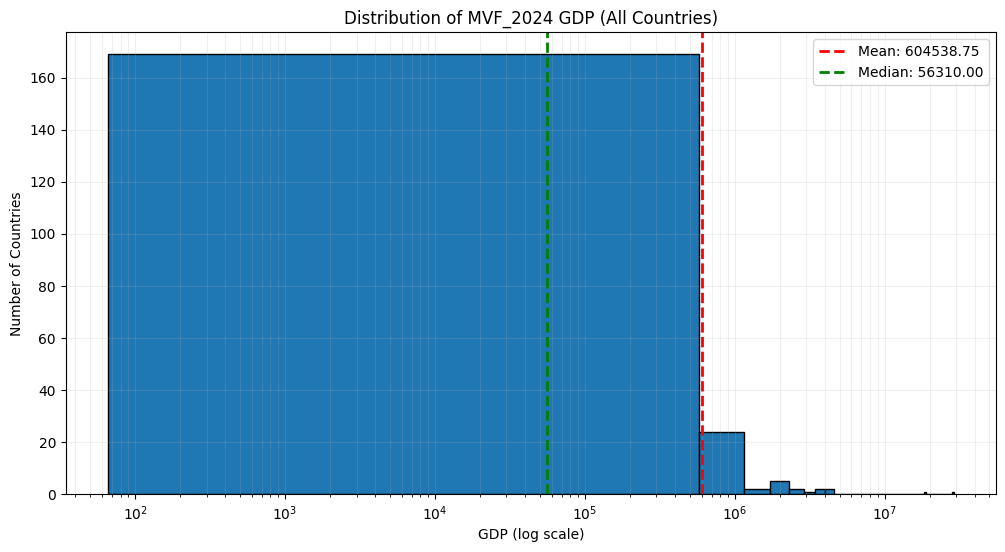


15. GDP Distribution Analysis:
Total number of countries: 209
Number of countries below mean GDP: 170
Number of countries above mean GDP: 39
Percentage of countries below mean GDP: 81.34%
Percentage of countries above mean GDP: 18.66%

Countries with exceptionally high GDP:
         Country    MVF_2024
0  United States  28781083.0
1          China  18532633.0


In [60]:
plt.figure(figsize=(12, 6))

# Use log scale for x-axis due to large range of GDP values
plt.hist(df['MVF_2024'], bins=50, edgecolor='black')
plt.xscale('log')

plt.title('Distribution of MVF_2024 GDP (All Countries)')
plt.xlabel('GDP (log scale)')
plt.ylabel('Number of Countries')

# Add vertical lines for mean and median
mean_gdp = df['MVF_2024'].mean()
median_gdp = df['MVF_2024'].median()

plt.axvline(mean_gdp, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_gdp:.2f}')
plt.axvline(median_gdp, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_gdp:.2f}')

plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

# Calculate and print some statistics
total_countries = len(df)
countries_below_mean = (df['MVF_2024'] < mean_gdp).sum()
countries_above_mean = (df['MVF_2024'] > mean_gdp).sum()

print(f"\n15. GDP Distribution Analysis:")
print(f"Total number of countries: {total_countries}")
print(f"Number of countries below mean GDP: {countries_below_mean}")
print(f"Number of countries above mean GDP: {countries_above_mean}")
print(f"Percentage of countries below mean GDP: {countries_below_mean/total_countries*100:.2f}%")
print(f"Percentage of countries above mean GDP: {countries_above_mean/total_countries*100:.2f}%")

# Find countries with exceptionally high GDP
high_gdp_countries = df[df['MVF_2024'] > mean_gdp + 2*df['MVF_2024'].std()]
print("\nCountries with exceptionally high GDP:")
print(high_gdp_countries[['Country', 'MVF_2024']])


16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [63]:
total_gdp = {
    'OON_2022': df['OON_2022'].sum(),
    'WorldBank_2023': df['WorldBank_2023'].sum(),
    'MVF_2024': df['MVF_2024'].sum()
}

for col in ['OON_2022', 'WorldBank_2023', 'MVF_2024']:
    df[f'{col}_Share'] = df[col] / total_gdp[col] * 100

print("\n16. Share of each country in total GDP for each year:")
for col in ['OON_2022', 'WorldBank_2023', 'MVF_2024']:
    print(f"\nTop 10 countries by {col} share:")
    print(df.nlargest(10, f'{col}_Share')[['Country', f'{col}_Share']])

# Calculate change in share
df['Share_Change'] = df['MVF_2024_Share'] - df['OON_2022_Share']

print("\nTop 5 countries with largest increase in GDP share from 2022 to 2024:")
print(df.nlargest(5, 'Share_Change')[['Country', 'Share_Change']])

print("\nTop 5 countries with largest decrease in GDP share from 2022 to 2024:")
print(df.nsmallest(5, 'Share_Change')[['Country', 'Share_Change']])


16. Share of each country in total GDP for each year:

Top 10 countries by OON_2022 share:
           Country  OON_2022_Share
0    United States       25.481167
1            China       17.779706
3            Japan        4.188948
2          Germany        4.035284
4            India        3.430146
5   United Kingdom        3.057522
6           France        2.746971
10          Russia        2.217540
9           Canada        2.116103
8            Italy        2.026046

Top 10 countries by WorldBank_2023 share:
          Country  WorldBank_2023_Share
0   United States             24.347287
1           China             15.834790
2         Germany              3.965270
3           Japan              3.748914
4           India              3.158916
5  United Kingdom              2.972147
6          France              2.697068
8           Italy              2.006492
7          Brazil              1.934249
9          Canada              1.904368

Top 10 countries by MVF_2024 share:
   

17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

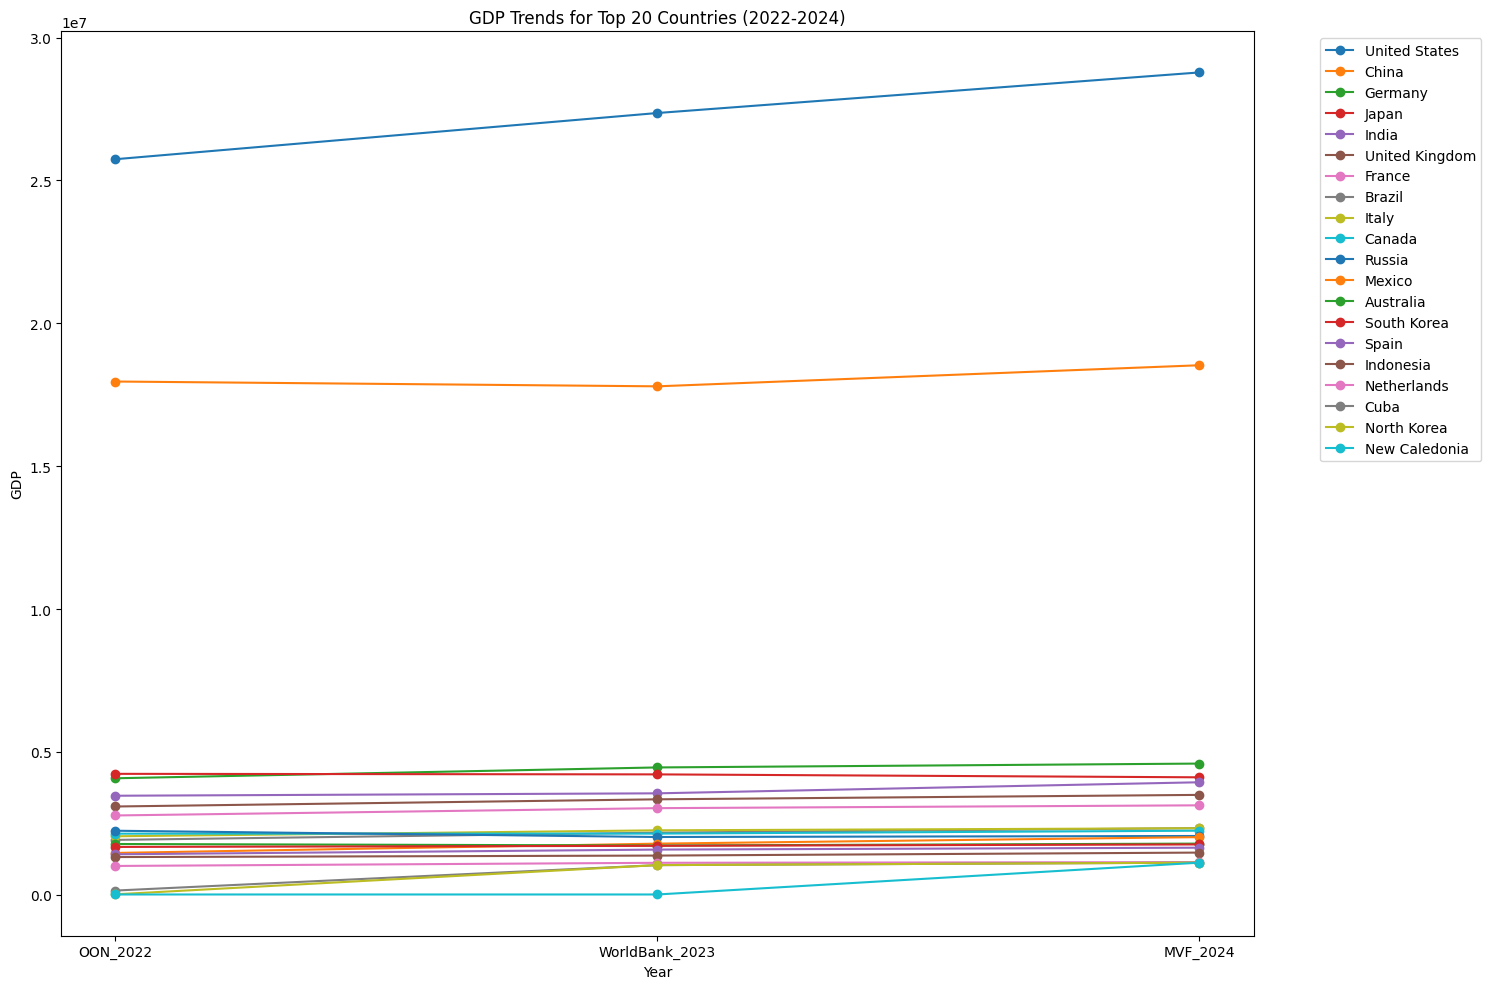


17. Countries showing stable growth:
['United States', 'Germany', 'India', 'United Kingdom', 'France', 'Brazil', 'Italy', 'Canada', 'Mexico', 'South Korea', 'Spain', 'Indonesia', 'Netherlands', 'Turkey', 'Switzerland', 'Poland', 'Belgium', 'Sweden', 'Ireland', 'Thailand', 'Austria', 'Singapore', 'Philippines', 'Vietnam', 'Iran', 'Bangladesh', 'Denmark', 'Hong Kong', 'Colombia', 'Romania', 'Finland', 'Portugal', 'Kazakhstan', 'Peru', 'Algeria', 'New Zealand', 'Greece', 'Hungary', 'Ethiopia', 'Ukraine', 'Morocco', 'Cuba', 'Slovakia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Bulgaria', 'Uzbekistan', 'Costa Rica', 'Luxembourg', 'Croatia', 'Panama', 'Ivory Coast', 'Uruguay', 'Serbia', 'Lithuania', 'Tanzania', 'DR Congo', 'Slovenia', 'Uganda', 'Tunisia', 'Macau', 'Jordan', 'Cameroon', 'Bolivia', 'Paraguay', 'Latvia', 'Cambodia', 'Nepal', 'Estonia', 'Honduras', 'Senegal', 'El Salvador', 'Zimbabwe', 'Cyprus', 'Iceland', 'Georgia', 'Bosnia and Herzegovina', 'Guinea', 'Albania', 'Armenia'

In [61]:
top_20_countries = df.nlargest(20, 'MVF_2024')['Country']

plt.figure(figsize=(15, 10))
for country in top_20_countries:
    country_data = df[df['Country'] == country]
    plt.plot(['OON_2022', 'WorldBank_2023', 'MVF_2024'],
             country_data[['OON_2022', 'WorldBank_2023', 'MVF_2024']].values[0],
             marker='o', label=country)

plt.title('GDP Trends for Top 20 Countries (2022-2024)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

def trend(row):
    if row['OON_2022'] < row['WorldBank_2023'] < row['MVF_2024']:
        return 'Stable Growth'
    elif row['OON_2022'] > row['WorldBank_2023'] > row['MVF_2024']:
        return 'Stable Decline'
    else:
        return 'Fluctuating'

df['Trend'] = df.apply(trend, axis=1)

stable_growth = df[df['Trend'] == 'Stable Growth']['Country'].tolist()
stable_decline = df[df['Trend'] == 'Stable Decline']['Country'].tolist()

print("\n17. Countries showing stable growth:")
print(stable_growth)

print("\nCountries showing stable decline:")
print(stable_decline)

Висновки:

Проведений аналіз надав глибоке розуміння економічних показників різних країн за останні три роки. Виявлені відхилення між прогнозами різних організацій підкреслюють важливість використання комплексного підходу до оцінки економічного стану країн. Кореляція між показниками свідчить про стабільність економічного розвитку більшості країн, однак варіативність і розподіл ВВП вказують на існування значної глобальної економічної нерівності. Аналіз частки країн у світовій економіці показав, як змінюється вплив країн з часом, а графічний аналіз виявив країни зі стабільним зростанням або спадом. Ці результати можуть слугувати основою для подальших досліджень та економічних прогнозів.